# Part 1

## やること

1. Assimilate the business scenario and articulate testable hypotheses.（ビジネスシナリオを同化し、テスト可能な仮説を明確にします。）
2. State the ideal data to address the business opportunity and clarify the rationale for needing specific data.（ビジネスチャンスに対処するための理想的なデータを述べ、特定のデータが必要な理由を明確にします。）
3. Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.（複数のデータソースから関連データを抽出するPythonスクリプトを作成し、データの取り込みプロセスを自動化します。）
4. Investigate the relationship between the relevant data, the target and the business metric.（関連するデータ、ターゲット、およびビジネス指標の間の関係を調査します。）
5. Articulate your findings using a deliverable with visualizations.（視覚化された成果物を使用して、調査結果を明確にします。）

## Our Story

Recently at AAVAIL there has been discussion among management about different approaches to revenue generation. AAVAIL launched using a tiered, subscription-based service which showed promise, but conversations with users, especially those outside of US markets, prompted an experiment using an à la carte approach. This experiment was carried out mostly outside of the US and there are now a couple of years of data with a few thousand active users. The data are transaction-level purchases across 38 different countries and are invoiced in batches. Management has nearly decided to make the switch to the new model, but they find it difficult to predict monthly revenue. They have asked you to create a service that, at any point in time, will predict the revenue for the following month. They have also asked that the service be given the ability to project revenue for a specific country. To keep the development time reasonable you have been advised to limit your model to the ten countries with the most revenue.

You have spoken at length with the managers who will be the end users of this model and they are confident that this product will have a meaningful business impact. Currently, these managers are using their own methods to predict revenue, but they have come to feel that they are spending too much time on this and their lack of expertise in data science means their predictions are not as accurate as they would like. The management team expects to spend less time creating their own projection models, and they expect the new results to be more accurate. They have assured you that well-projected numbers will help stabilize staffing and budget projections which will have a beneficial ripple effect throughout the company.

### 和訳

最近AAVAILで、収益創出へのさまざまなアプローチについて経営陣の間で議論がありました。 AAVAILは、有望な段階的なサブスクリプションベースのサービスを使用して開始されましたが、ユーザー、特に米国市場以外のユーザーとの会話により、アラカルトアプローチを使用した実験が行われました。この実験は主に米国外で実施され、現在、数千人のアクティブユーザーがいる数年のデータがあります。データは38か国にわたるトランザクションレベルの購入であり、バッチで請求されます。経営陣は新しいモデルへの切り替えをほぼ決定しましたが、月間収益を予測することは困難です。彼らは、いつでも翌月の収益を予測するサービスを作成するように依頼しました。彼らはまた、サービスに特定の国の収益を予測する機能を与えるように求めています。開発時間を合理的に保つために、モデルを最も収益の高い10か国に限定することをお勧めします。

このモデルのエンドユーザーとなるマネージャーと長々と話をしましたが、彼らはこの製品がビジネスに有意義な影響を与えると確信しています。 現在、これらのマネージャーは独自の方法で収益を予測していますが、これに多くの時間を費やしていると感じており、データサイエンスの専門知識が不足しているため、予測が思ったほど正確ではありません。 管理チームは、独自の予測モデルの作成に費やす時間が少なくて済み、新しい結果がより正確になることを期待しています。 彼らは、よく予測された数が人員配置と予算予測を安定させるのに役立ち、会社全体に有益な波及効果をもたらすことを保証しました。

## import packages

In [1]:
import sys
sys.path.append("../solution-guidance/")
import cslib

## parameter settings

In [3]:
path_data = "../data/"
path_data_production = path_data + "cs-production/"
path_data_train = path_data + "cs-train/"

## 問題と回答

### 1.Assimilate the business scenario and articulate testable hypotheses.（ビジネスシナリオを同化し、テスト可能な仮説を明確にします。）

#### 説明

Take what you have read from the stories and from what you know about the business scenario and, in your own words, carefully re-state the business opportunity. Given the stated opportunity, enumerate the testable hypotheses.

ストーリーやビジネスシナリオについて知っていることから読んだことを取り入れ、自分の言葉で、ビジネスチャンスを注意深く言い直してください。 述べられた機会を前提として、検証可能な仮説を列挙します。

#### 回答

- 翌月の収益が精度よく予測できるようになれば、会社全体にとって有益となる
- 関連する指標と同時に収益は上昇 or 下降する
- 週ごとに収益の傾向は同じになる

### 2.State the ideal data to address the business opportunity and clarify the rationale for needing specific data.（ビジネスチャンスに対処するための理想的なデータを述べ、特定のデータが必要な理由を明確にします。）

#### 説明

Note that this step is carried out **before you read in the data**. It helps clarify exactly what your are looking for in the data and it helps provide context for what the feature matrix and targets will look like.

このステップは、データを読み込む前に実行されることに注意してください。 これは、データで探しているものを正確に明確にするのに役立ち、機能マトリックスとターゲットがどのように見えるかについてのコンテキストを提供するのに役立ちます。

#### 回答

##### the ideal data to address the business opportunity
- 過去2年以上の月ごとの収益データ
- 収益に関連しそうな内部・外部データ

##### the rationale for needing specific data
- 1年ごとの傾向がつかめれば翌年の同じ月の収益を予測できる
- 収益に関連しそうなデータであれば回帰が可能

### 3.Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.（複数のデータソースから関連データを抽出するPythonスクリプトを作成し、データの取り込みプロセスを自動化します。）

#### 説明

From within a Python module there should be a function that reads in the data, attempts to catch common input errors and returns a feature matrix (NumPy array or Pandas DataFrame) that will subsequently be used as a starting point for EDA and modeling.

Pythonモジュール内から、データを読み込み、一般的な入力エラーをキャッチしようとし、EDAとモデリングの開始点として後で使用される機能マトリックス（NumPy配列またはPandas DataFrame）を返す関数が必要です。

#### 回答

In [4]:
# 生データの取得
df_raw = cslib.fetch_data(path_data_train)

In [5]:
# 時系列にしたDataFrameを国ごとの辞書にする
dct_df_time = cslib.fetch_ts(path_data_train)

... loading ts data from files


In [6]:
# 辞書のキー一覧
dct_df_time.keys()

dict_keys(['all', 'eire', 'france', 'germany', 'hong_kong', 'netherlands', 'norway', 'portugal', 'singapore', 'spain', 'united_kingdom'])

In [7]:
# all の確認
dct_df_time["all"][28:35]

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
28,2017-11-29,3277,133,1397,14159,2017-11,13411.96
29,2017-11-30,3002,150,1335,15766,2017-11,13290.25
30,2017-12-01,2559,107,1256,12524,2017-12,9687.28
31,2017-12-02,402,32,287,3313,2017-12,1443.26
32,2017-12-03,1942,90,977,8544,2017-12,6432.94
33,2017-12-04,2869,123,1354,12751,2017-12,13137.50
34,2017-12-05,2440,170,1196,12604,2017-12,9467.01


In [8]:
# 日数の確認
len(dct_df_time["all"])

607

### 4.Investigate the relationship between the relevant data, the target and the business metric.（関連するデータ、ターゲット、およびビジネス指標の間の関係を調査します。）

#### 説明

Using the feature matrix and the tools abvailable to you through EDA spend some time to get to know the data.

EDAを通じて利用できる特徴量行列とツールを使用して、データを理解するために時間を費やします。

#### 回答

In [9]:
# 国の確認
df_raw["country"].unique()

array(['United Kingdom', 'France', 'Belgium', 'Australia', 'USA', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [10]:
# 対象の期間を確認
df_raw["invoice_date"].unique()[[0,-1]]

array(['2017-11-28T00:00:00.000000000', '2019-07-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [11]:
# 国ごとに購入金額を集計して確認する
lst_groupby = ["country"]
name_price = "price"
df_raw.groupby(lst_groupby)[name_price].sum().reset_index().sort_values(name_price, ascending=False)

,country,price
40,United Kingdom,3.521514e+06
11,EIRE,1.070692e+05
15,Germany,4.927182e+04
14,France,4.056514e+04
28,Norway,3.849475e+04
34,Spain,1.604099e+04
17,Hong Kong,1.445257e+04
30,Portugal,1.352867e+04
33,Singapore,1.317592e+04
26,Netherlands,1.232280e+04


### 5.Articulate your findings using a deliverable with visualizations.（視覚化された成果物を使用して、調査結果を明確にします。）

#### 説明

Summarize what you have learned in your investigations using visualizations.

視覚化を使用して、調査で学んだことを要約します。

#### 回答

<BarContainer object of 10 artists>

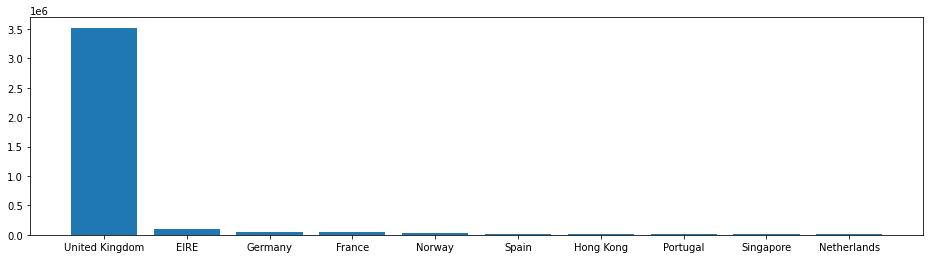

In [14]:
# 国ごとの売上金額上位10
# これらに絞ることを決定
lst_groupby = ["country"]
name_price = "price"
df_tmp = df_raw.groupby(lst_groupby)[name_price].sum().reset_index().sort_values(name_price, ascending=False)

# 上位10位に絞る
df_upper_10 = df_tmp[:10]

# 棒グラフの表示
left = df_upper_10["country"]
right = df_upper_10[name_price]
cslib.plt.figure(figsize=(16, 4))
cslib.plt.bar(left, right)

対象期間は2017/11/28 ~ 2019/7/31, 本期間での総収益上位10位の国に絞ってモデルの構築を行います  
収益では英国が 3,521,514 とずば抜けています

以下、英国に絞ってデータの傾向を見ていきます

In [15]:
# 英国が一番多いので今後使うことにする
name_uk = "united_kingdom"
# 英国のデータ
df_uk = dct_df_time[name_uk]

purchases end.
unique_invoices end.
unique_streams end.
total_views end.
revenue end.


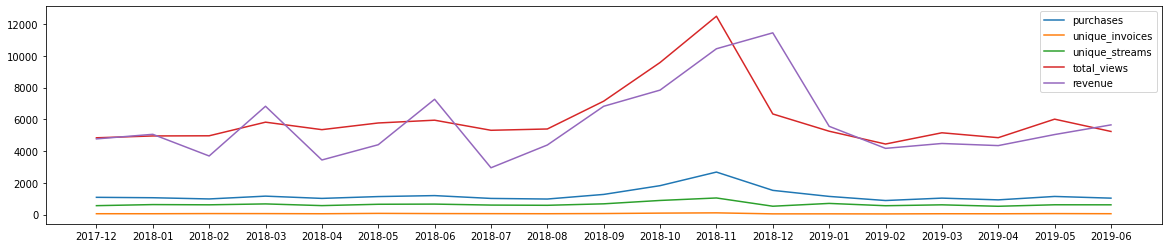

In [38]:
# 月ごとのデータの傾向を確認する
name_month = "year_month"
name_date = "date"
# 月ごとに集計したデータ
df = df_uk[df_uk[name_date]>="2017-12-01"].groupby(name_month).mean().reset_index()

# 表示対象の列リスト
lst_show_columns = ["purchases", "unique_invoices", "unique_streams", "total_views", "revenue"]

# 月ごとの各列の表示
fig, ax = cslib.plt.subplots(figsize=(20, 4))
for show_column in lst_show_columns:
    ax.plot(df[name_month], df[show_column], label=show_column)
    print(show_column + " end.")
ax.legend()
cslib.plt.show()

revenue は基本的に total_views に追随しますが、2018年12月はtotal_views が前月に比べて少なくなっておりますが、revenue は高いままです。  
また、2018年11月には purchases が他に比べて高くなっております。

c:\users\einosukeiida\.virtualenvs\ai-workflow-capstone-w4xzojd0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


purchases end.
unique_invoices end.
unique_streams end.
total_views end.
revenue end.


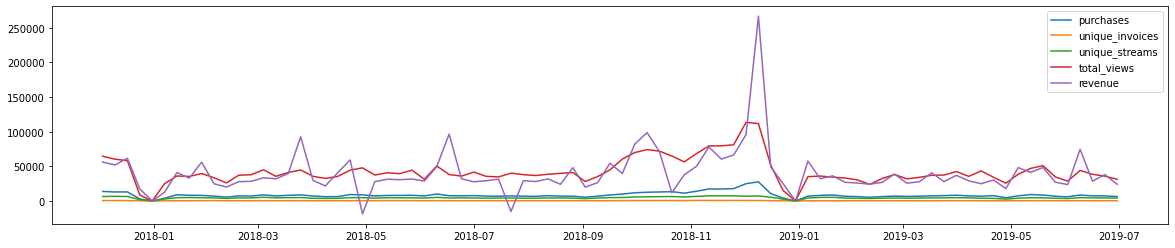

In [41]:
# 週ごとに集計
# 2017/11/28 から7日ごとに同じ周期の購入になることを確認する
name_date = "date"
df = df_uk[df_uk[name_date]>="2017-11-28"]
df[name_date] = cslib.pd.to_datetime(df[name_date])
df = df.set_index(name_date).resample("W").sum()

# 表示対象の列リスト
lst_show_columns = ["purchases", "unique_invoices", "unique_streams", "total_views", "revenue"]

# 週ごとの各列の表示
fig, ax = cslib.plt.subplots(figsize=(20, 4))
for show_column in lst_show_columns:
    ax.plot(df.index, df[show_column], label=show_column)
    print(show_column + " end.")
ax.legend()
cslib.plt.show()

週単位でみても revenue は total_views に追随しますが、落ち込んでいる週が存在することが見て取れます。

c:\users\einosukeiida\.virtualenvs\ai-workflow-capstone-w4xzojd0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


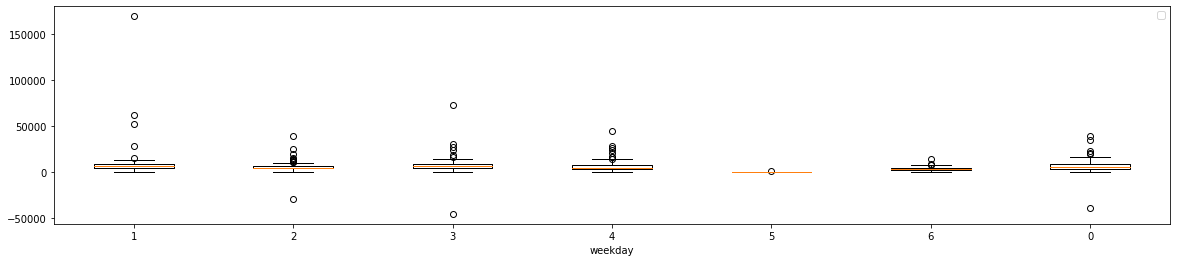

In [47]:
# 曜日で変化はあるのか確認
# 表示対象の列
name_show_column = "revenue"
# 曜日のデータを紐づける
name_date = "date"
name_weekday = "weekday"
df = df_uk[df_uk[name_date]>="2017-11-28"]
df[name_date] = cslib.pd.to_datetime(df[name_date])
df = df.set_index(name_date)
df[name_weekday] = df.index.weekday
lst_weekday = df[name_weekday].unique()
dct_weekday_lst_revenue = {weekday:df.loc[df[name_weekday]==weekday, name_show_column] for weekday in lst_weekday}

# 曜日ごとに箱ひげ図を作成
fig, ax = cslib.plt.subplots(figsize=(20, 4))
data = (dct_weekday_lst_revenue[1]
       , dct_weekday_lst_revenue[2]
       , dct_weekday_lst_revenue[3]
       , dct_weekday_lst_revenue[4]
       , dct_weekday_lst_revenue[5]
       , dct_weekday_lst_revenue[6]
        , dct_weekday_lst_revenue[0]
       )
ax.boxplot(data)
ax.set_xticklabels(lst_weekday)
cslib.plt.xlabel(name_weekday)
ax.legend()
cslib.plt.show()

曜日ごとに大きな違いはなさそうである。